# Group Project Proposal - Group 19
### Brett King, Samantha Malinab, Yinuo Sun, Athena Wong

## Introduction

When massive stars die in a supernova explosion, they leave behind a small remnant called a neutron star. Neutron stars spin very quickly, and produce two jets of electromagnetic radiation due to their extremely powerful magnetic field. When one of these jets sweeps across Earth as the neutron star rotates, we can directly observe it, and it appears as a pulsing star; hence, these objects are called PULSARS (1).

Each pulsar is identified by two curves.

1. As the electromagnetic jet sweeps across Earth, we observe a spike in the frequency of light the pulsar emits. This spike is small, however, so a measurement is made for each rotational period of the pulsar in a given time, and all of these measurements are averaged to reveal a more visible and clear graph of signal strength over rotational period. This graph is called the *integrated profile* (2).

2. The signal-noise ratio versus dispersion measure (DM-SNR) curve, which plots the ratio of signal strength to noise strength when a measurement is made versus the density of free electrons along the line of sight to the pulsar (2) (3).

With this knowledge, we will set out to answer the following question: *Do true pulsars tend to clear their lines of sight of free electrons?*

To answer it, we will use the HTRU2 dataset, which contains information about the curves discussed above for about 18000 pulsar candidates, as well as the candidates' true status as a pulsar or not. An important thing to note about this dataset is that the statistics regarding the integrated profile and DM-SNR curve are for *signal strength* and *signal-noise ratio* respectively.

## Methods

We expect that if true pulsars do clear their lines of sight of free electrons, then by definition their dispersion measure would be smaller. According to Roelof Grootjans, higher dispersion measure relates to lower signal-noise ratio (1), so logically lower dispersion measure should correlate with higher signal-noise ratio (in terms of the dataset, the mean of the DM-SNR curve would be higher). A low dispersion measure would also enhance the "spikiness" of the pulsar's signal, which should manifest as a higher excess kurtosis in the integrated profile, since there would be more pronounced extremes in the signal.

Thus, if true pulsars clear their line of sight of free electrons, then we should be able to accurately predict whether a pulsar candidate is a true pulsar using K-nearest neighbours classification based on a candidate's DM-SNR mean and integrated profile excess kurtosis.

## Preliminary Exploratory Data Analysis

In [68]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

In [69]:
pulsar <- read_csv(url("https://raw.githubusercontent.com/Kugelblitz64/dcsi100group19/main/HTRU_2.csv"),
                   col_names = c("int_pro_mean", "int_pro_std", "int_pro_excess_kurtosis", "int_pro_skew",
                                 "dm_snr_mean", "dm_snr_std", "dm_snr_excess_kurtosis", "dm_snr_skew", "class")
                   ) |>
mutate(class = as_factor(class))
pulsar

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): int_pro_mean, int_pro_std, int_pro_excess_kurtosis, int_pro_skew, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


int_pro_mean int_pro_std int_pro_excess_kurtosis int_pro_skew dm_snr_mean
1     140.5625     55.68378    -0.2345714              -0.6996484   3.199833   
2     102.5078     58.88243     0.4653182              -0.5150879   1.677258   
3     103.0156     39.34165     0.3233284               1.0511644   3.121237   
⋮     ⋮            ⋮           ⋮                       ⋮            ⋮          
17896 119.3359     59.93594    0.1593631               -0.74302540   21.430602 
17897 114.5078     53.90240    0.2011614               -0.02478884    1.946488 
17898  57.0625     85.79734    1.4063910                0.08951971  188.306020 
      dm_snr_std dm_snr_excess_kurtosis dm_snr_skew class
1     19.11043    7.975532               74.24222   0    
2     14.86015   10.576487              127.39358   0    
3     21.74467    7.735822               63.17191   0    
⋮     ⋮          ⋮                      ⋮           ⋮    
17896 58.87200    2.499517                4.595173  0    
17897 13.38173   10.007967              134.238910  0    
17898 64.71256   -1.597527                1.429475  0

class count int_pro_xs_kurt_avg dm_snr_avg
1 0     16259 0.2104401            8.863258 
2 1      1639 3.1306554           49.825995

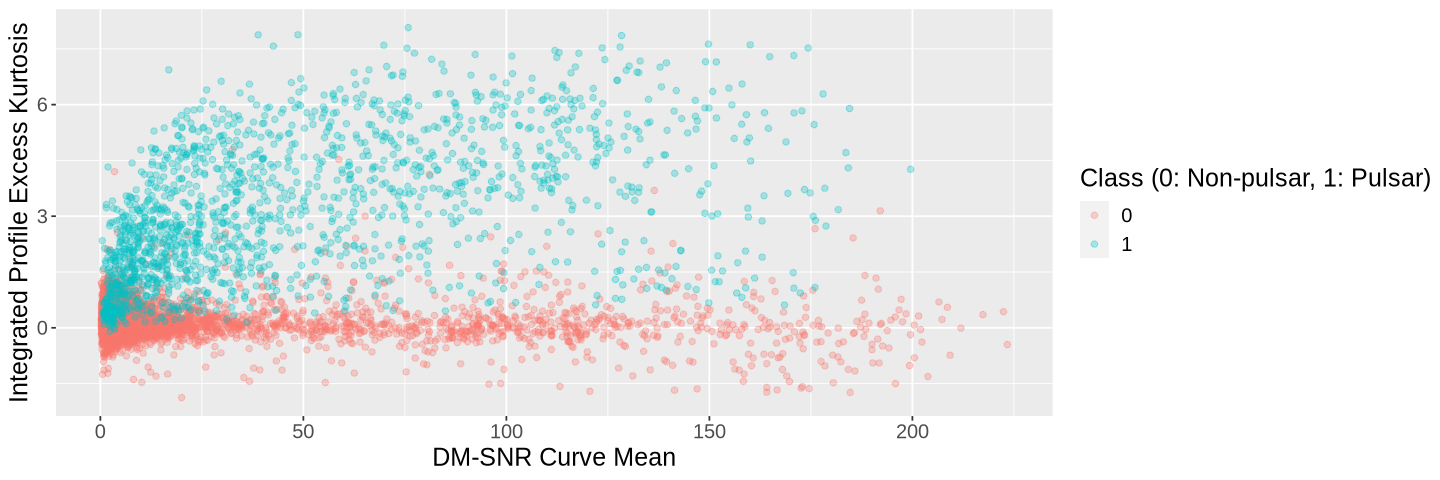

In [72]:
pulsar |>
group_by(class) |>
summarize(count = n(), int_pro_xs_kurt_avg = mean(int_pro_excess_kurtosis), dm_snr_avg = mean(dm_snr_mean))

options(repr.plot.width = 12, repr.plot.height = 4)

pulsar |>
arrange(class) |>
ggplot(aes(x = dm_snr_mean, y = int_pro_excess_kurtosis, colour = class)) +
geom_point(alpha = 0.3) +
labs(x = "DM-SNR Curve Mean", y = "Integrated Profile Excess Kurtosis", colour = "Class (0: Non-pulsar, 1: Pulsar)") +
theme(text = element_text(size = 15))

## Expected Outcomes and Significance

Our exploratory data analysis seems to lean towards our predictions for if pulsars do clear their lines of sight of free electrons, since both variables we made predictions about appear to generally line up with the predictions. That is, both the DM-SNR curve mean (average signal-noise ratio) and integrated profile excess kurtosis ("spikiness" of the pulsar's signal) are higher on average for true pulsars than for false candidates. Therefore, we expect to find that pulsars do, in fact, have a tendency to clear their lines of sight of free electrons.

This could possibly have an effect on how we think about the distribution of matter in the galaxy, since if it turns out that pulsars do clear their lines of sight of electrons, then there would be a patchwork of cones in the galaxy that electrons are ejected from, perhaps creating interesting divisions of particle density. This could then lead to questions about if this phenomenon influences gravitational phenomena in the galaxy, such as if the density division created by a pulsar affects the formation of interstellar gas clouds.

## References

(1) https://essay.utwente.nl/71435/1/GROOTJANS_MA_EWI.pdf

(2) http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf

(3) https://www.researchgate.net/figure/An-example-Pulsar-0003-from-HTRU-1-dataset-These-four-subplots-are-folded-profile_fig1_335483097